In [1]:
from mylib import read_stats, plot_confidence_interval
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BASE_DIR = "../simulations/results/"
# repeat = 10
# **.spawner.tl = 0
# **.spawner.to = exponential(${3..27 step 3}min)
# **.spawner.tp = 0
# **.spawner.tn = exponential(30min)
tl = 0
TO = range(3, 30, 3)
tp = 0
tn = 30
REP = range(10)

stats = read_stats(BASE_DIR + "Degeneracy1-{}-#{}.sca.csv", TO, REP)
stats.keys()

dict_keys(['landQueueLen', 'landQueueTime', 'numParked', 'toffQueueLen', 'toffQueueTime'])

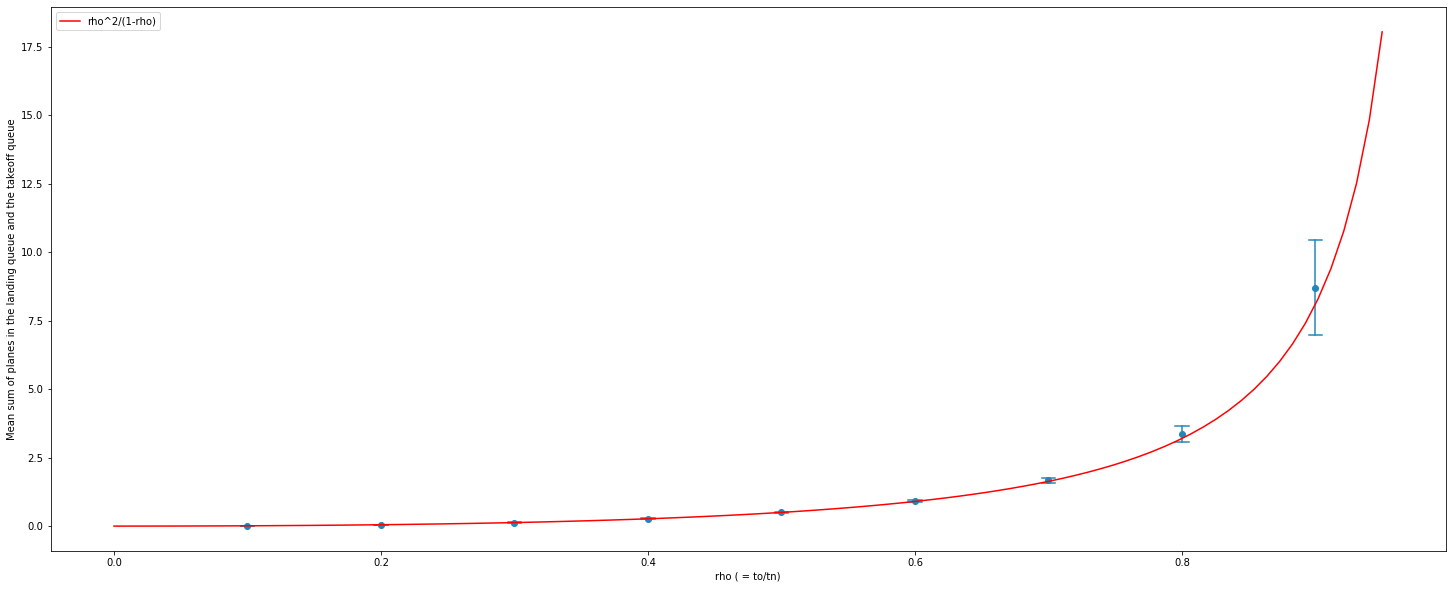

In [5]:
# show sum of queueLengths varing to/tn
plt.rcParams["figure.figsize"] = (25, 10)
land = stats["landQueueLen"]
toff = stats["toffQueueLen"]
for to in TO:
	v = [land[to,rep].timeavg + toff[to,rep].timeavg for rep in REP]
	plot_confidence_interval(to/tn, np.array(v))
rho = np.linspace(0, 0.95, 100)
plt.plot(rho, rho**2/(1-rho), color='r', label="rho^2/(1-rho)")
plt.ylabel("Mean sum of planes in the landing queue and the takeoff queue")
plt.xlabel("rho ( = to/tn)")
plt.legend(loc="upper left")
plt.show()